## Initial Inspection of FinTech Users Data

## Table of Contents

1. [Dataset Overview](#-dataset-overview)
2. [Data Loading](#-data-loading)
3. [Data Structure](#-data-structure)
4. [Missing Values & Duplicates](#️-missing-values--duplicates)
5. [Summary Statistics](#-summary-statistics)
6. [Data Distribution & Visualisations](#-initial-visualizations)
7. [Correlations and Relationships](#-correlations-and-relationships)
8. [Feature Distributions](#8-feature-distributions)
9. [Initial Insights and Next Steps](#-initial-insights-and-next-steps)


## 1. Dataset Overview

This notebook presents an initial exploratory data analysis (EDA) of the FinTech Users Data from [Kaggle](https://www.kaggle.com/datasets/niketdheeryan/fintech-users-data). The dataset contains information on user activity, engagement, and financial behavior, with a particular focus on identifying patterns related to user churn.

Objectives
 - Understand the structure and content of the dataset.
 - Identify missing values, duplicates, and potential data quality issues.
 - Explore distributions of numerical and categorical features.
 - Investigate potential relationships with churn through visualisations and correlations.
 - Generate initial insights to guide data cleaning, feature engineering, and model development.

## 2. Data Loading

In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

The dataset was loaded using pandas from a CSV file using the `read_csv()` function:


In [7]:
# Load the dataset
df = pd.read_csv('../Data/RAW/Fintech_user.csv')  
df.head()  # Display the first few rows of the dataset

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


## 3. Data Structure
In this section, we examine the structure of the dataset to understand its overall layout and types of data.

- **General Info (`df.info()`)**  
  Provids a concise summary of the dataset including:
  - Total number of entries (rows)
  - Number of columns
  - Data types for each column
  - Number of non-null (non-missing) values
  - Memory usage

- **Shape of the Dataset (`df.shape`)**  
Reveals the number of rows and columns, providing a quick view of the dataset size.

- **Column Data Types (`df.dtypes`)**  
Identifies the data type of each column (e.g., int64, float64, object), which is essential for determining which types of operations or preprocessing steps are applicable.

- **Column Names (`df.columns`)** 
Lists all feature names to get an overview of what information is included in the dataset.

In [30]:
# Checking the summary of the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [31]:
# Checking dimensions of the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (27000, 31)


In [32]:
# Checking data types
print(df.dtypes)

user                         int64
churn                        int64
age                        float64
housing                     object
credit_score               float64
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
rewards_earned      

In [33]:
# Checking column names
print("Column Names:", df.columns)

Column Names: Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')


### Initial Observation
 - Most features are numerical and likely binary flags (0 or 1).
 - Several columns suggest user engagement funnels (e.g., `cc_liked`, `cc_application_begin`).
 - A few categorical columns may require encoding before modelling.
 - Missing values in `credit_score` are substantial and will likely need special handling.

## 4. Missing Values and Duplicates
In this step, we assess the quality of the dataset by identifying missing values and duplicate rows.

- **Missing Values (`df.isnull().sum()`)**  
  Checks each column for missing (null) values. 

- **Duplicate Rows (`df.duplicated().sum()`)**  
  Checks for duplicated records, which can skew analysis if not handled.

In [34]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 age                  4
credit_score      8031
rewards_earned    3227
dtype: int64


In [35]:
#checking for duplicates
duplicates = df.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 458


### Initial Observation

The following columns contain missing values:
  - `credit_score`: 8,031 missing values (~29.7% of the dataset)
  - `rewards_earned`: 3,227 missing values (~11.9%)
  - `age`: 4 missing values (negligible)

Duplicate Records:  
  - **458 duplicate rows** were found in the dataset.
  - These rows may be exact duplicates and should be removed to prevent bias in analysis or model training.

These will need to be addressed in data cleaning.  
  - `age` can likely be imputed with the median or mean.
  - `credit_score` may require more careful treatment due to its high missingness.

## 5. Summary Statistics
To gain an initial understanding of the values in each feature, we compute summary statistics for both numerical and categorical columns.

- **Numerical Columns Summary (`df.describe()`)**  
  Displays count, mean, standard deviation, min, max, and quartile values (25%, 50%, 75%) for all numerical features.

- **Categorical Columns Summary (`df.describe(include='object')`)**  
  Provides summary metrics for categorical (object-type) columns

In [36]:
# Checking numerical summary statistics
numerical_summary = df.describe()
print("Numerical Summary:\n", numerical_summary)

Numerical Summary:
                user         churn           age  credit_score      deposits  \
count  27000.000000  27000.000000  26996.000000  18969.000000  27000.000000   
mean   35422.702519      0.413852     32.219921    542.944225      3.341556   
std    20321.006678      0.492532      9.964838     61.059315      9.131406   
min        1.000000      0.000000     17.000000      2.000000      0.000000   
25%    17810.500000      0.000000     25.000000    507.000000      0.000000   
50%    35749.000000      0.000000     30.000000    542.000000      0.000000   
75%    53244.250000      1.000000     37.000000    578.000000      1.000000   
max    69658.000000      1.000000     91.000000    838.000000     65.000000   

         withdrawal  purchases_partners     purchases      cc_taken  \
count  27000.000000        27000.000000  27000.000000  27000.000000   
mean       0.307000           28.062519      3.273481      0.073778   
std        1.055416           42.219686      8.953077  

In [37]:
#Checking categorical summary statistics
categorical_summary = df.describe(include=['object'])
print("Categorical Summary:\n", categorical_summary)

Categorical Summary:
        housing payment_type zodiac_sign
count    27000        27000       27000
unique       3            5          13
top         na    Bi-Weekly      Cancer
freq     13860        12716        2424


### Initial Observation

  - A number of columns show strong skew (e.g., `purchases`, `rewards_earned`).
  - `credit_score` and `rewards_earned` may contain outliers.
  - Categorical columns will need encoding for further analysis.
  - Consider treating `'na'` in `housing` as missing during data cleaning.
  - `age` ranges from **17 to 91**, with a mean around **32** years.

### 6. Data Distribution and Visualisations
- Histograms, boxplots for numerical features.
- Bar plots for categorical features.

Each histogram below shows the distribution of a numerical feature. 

Note: In the histograms shown below, the x-axis represents the values of each variable (e.g., number of deposits, credit score), while the y-axis represents the number of users falling within each value range.

For example:
- `deposits`: Number of deposits made by each user
- `rewards_earned`: Cumulative reward points earned (unit not specified)
- `reward_rate`: Likely a ratio or rate (e.g., rewards per purchase), values are continuous

Where units are unclear (like `rewards_earned`), we interpret them based on context, but further documentation may be needed for precision.

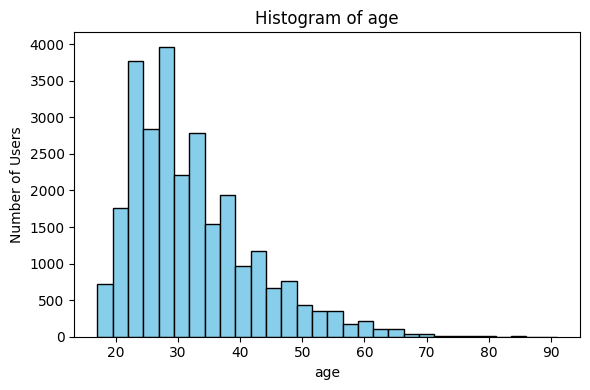

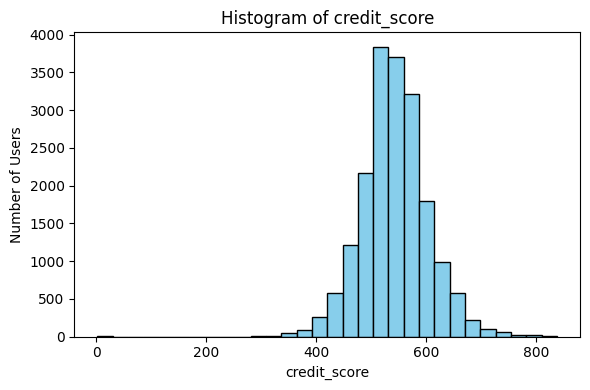

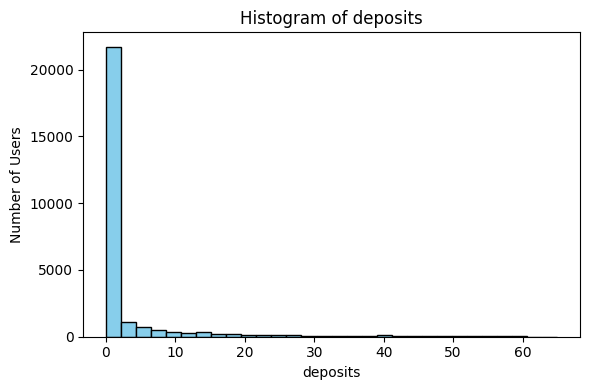

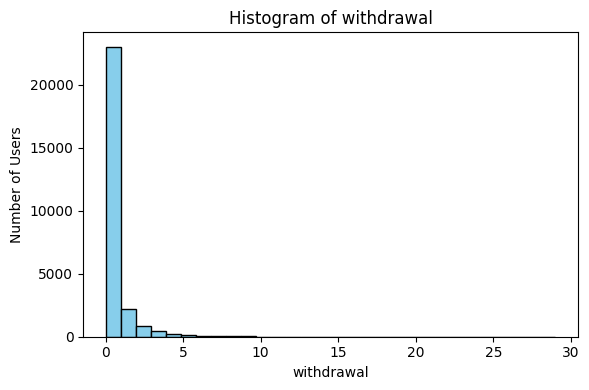

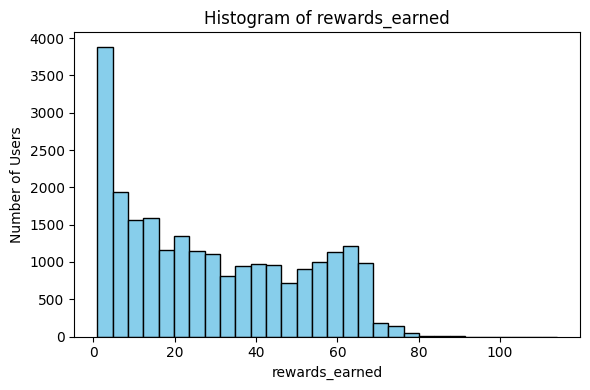

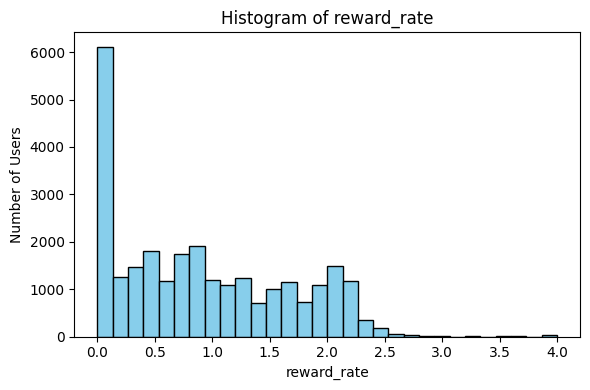

In [43]:
# Manually define the numerical columns you want to visualize
hist_cols = ['age', 'credit_score', 'deposits', 'withdrawal', 'rewards_earned', 'reward_rate']

# Plot histograms for each column
for col in hist_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Number of Users')
        plt.tight_layout()
        plt.show()


Next, will create boxplots for selected continuous variables to identify outliers and data distribution.

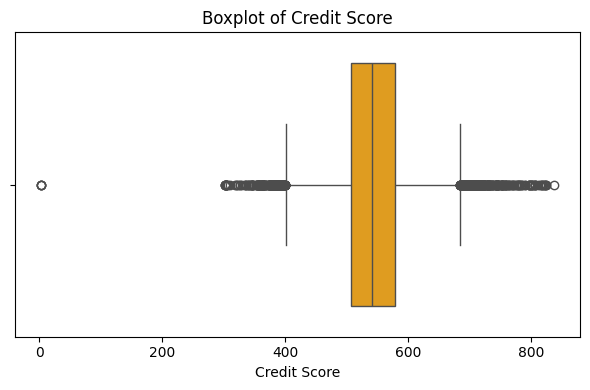

In [46]:

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['credit_score'], color='orange')
plt.title("Boxplot of Credit Score")
plt.xlabel("Credit Score")
plt.tight_layout()
plt.show()

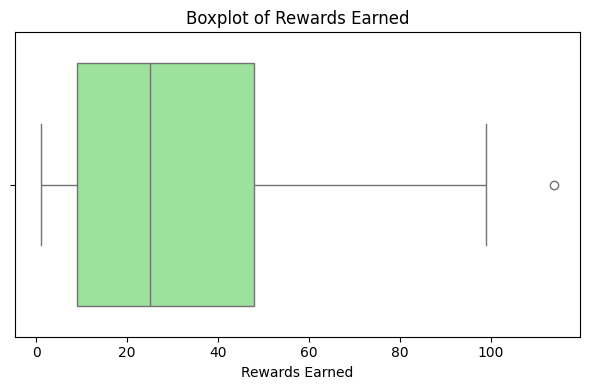

In [47]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['rewards_earned'], color='lightgreen')
plt.title("Boxplot of Rewards Earned")
plt.xlabel("Rewards Earned")
plt.tight_layout()
plt.show()

### 7. Correlations and Relationships
In this section, we explore the relationships between key numerical features to understand how they interact and potentially influence each other.
- Correlation Matrix:

    It calculates how strongly and in what way the selected features are related to each other. This shows which variables tend to change together and can reveal connections or overlaps in the data.

- Selected Features:

    We focus on a subset of important variables including user churn status, credit score, reward-related metrics, transaction counts, and age to gain insights relevant to user behaviour and financial activity.

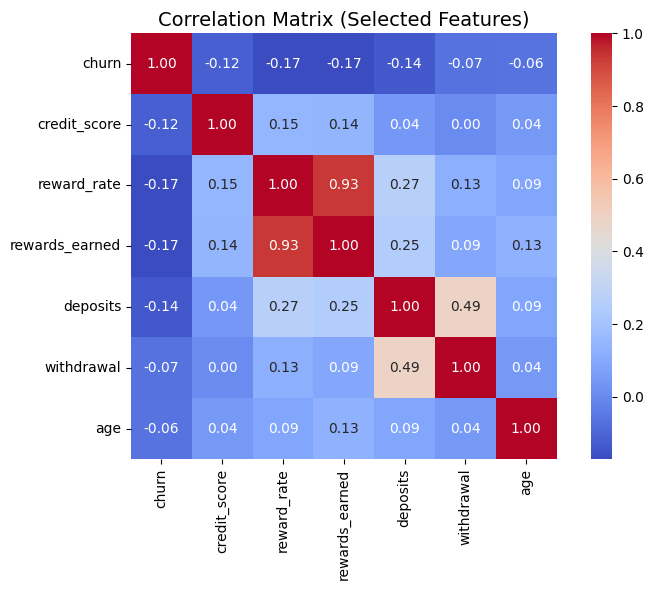

In [50]:
selected_cols = [
    'churn', 'credit_score', 'reward_rate', 'rewards_earned',
    'deposits', 'withdrawal', 'age'
]

# Subset the dataframe
subset = df[selected_cols]

# Compute correlation matrix
corr = subset.corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix (Selected Features)", fontsize=14)
plt.tight_layout()
plt.show()

The correlation matrix indicates that reward-based metrics (reward_rate and rewards_earned) exhibit the strongest positive relationship among the selected features. Both show a weak negative correlation with churn, suggesting that higher engagement with rewards may be slightly associated with lower customer churn. Overall, no single feature shows a strong linear correlation with churn on its own.

This is a correlation series between churn and all other variables, ordered by strength. Correlation values range from:

+1.0: strong positive relationship

-1.0: strong negative relationship

~0: little or no linear relationship



In [49]:
# Correlation with churn
corr_churn = corr['churn'].sort_values(ascending=False)
print(corr_churn)

churn                      1.000000
user                       0.068477
cc_taken                   0.058400
rejected_loan              0.056463
received_loan              0.049974
left_for_one_month         0.036149
cancelled_loan             0.035290
web_user                   0.035201
registered_phones          0.028634
ios_user                   0.017125
app_web_user               0.011232
cc_liked                   0.010893
cc_disliked                0.009430
left_for_two_month_plus    0.005150
waiting_4_loan            -0.013553
android_user              -0.036663
app_downloaded            -0.055504
age                       -0.063206
withdrawal                -0.068503
is_referred               -0.083277
credit_score              -0.117781
cc_application_begin      -0.118498
deposits                  -0.135327
purchases                 -0.135867
reward_rate               -0.167016
rewards_earned            -0.170863
cc_recommended            -0.198413
purchases_partners        -0

The correlation analysis with churn reveals that features like purchases_partners, cc_recommended, rewards_earned, and reward_rate have the strongest negative linear relationships with churn, suggesting higher engagement may reduce churn. Most variables show weak correlations, indicating that churn may be influenced by a combination of factors rather than any single metric.

## 8. Feature Distributions
Plotly Histogram: rewards_earned (Shows distribution across users)

A Plotly histogram was used to explore the distribution of rewards earned by users. The chart reveals how reward accumulation is spread across the user base, helping identify typical and extreme behavior. This supports earlier findings that rewards engagement may influence churn patterns.

In [51]:
fig = px.histogram(df, x="rewards_earned", nbins=40, title="Distribution of Rewards Earned")
fig.update_layout(xaxis_title="Rewards Earned", yaxis_title="Number of Users")
fig.show()

### 8. Initial Insights and Next Steps

Initial Insights: 
 - The dataset contains 27,000 users and 31 columns, a mix of numerical and categorical features.
 - Several features have missing values, most notably `credit_score`, `rewards_earned`, and `age`. There are also 458 duplicate rows, which should be considered for removal.
 - Reward-related features (rewards_earned, reward_rate) show a moderate negative correlation with churn, suggesting that users who engage more with rewards are less likely to churn.
 - Other features with negative correlations to churn include `purchases_partners`, `deposits`, and `credit_score`, although the correlations are weak to moderate.
 - Most features show weak individual correlation with churn, indicating that churn behaviour is likely influenced by multiple factors together.
 - The data is not normally distributed in several key columns (e.g., rewards, deposits), and may require transformation or scaling before modelling.
 - An interactive histogram showed that most users earn low rewards, suggesting a skewed distribution with a small group of high-engagement users.

Next Steps: 
 - Data Cleaning:
    - Handle missing values appropriately (e.g., imputation or removal).
    - Remove duplicate records.

- Feature Engineering:
    - Create derived features (e.g., total transactions, engagement scores).
    - Convert categorical variables.
